# 간단한 머신러닝 제작2
* train / test set split
  * "샘플링 편향" : 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있어야 함. 한쪽으로 치우친 경우를 의미.
  * 샘플링 편향을 없애는 데이터 분리가 필요하며 셔플에는 두가지 방법이 있다.
      * `random.shuffle`을 이용한 방법
      * `train_test_split()` 를 이용한 방법 (추천)
* 데이터 전처리 - scailing 의 이유
  * `np.column_stack()`, `np.concatenate()`
  * `train_test_split()`
  * `np.mean()`, `np.std()`로 표준화처리

## 1. 데이터셋 분리

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [3]:
import numpy as np

In [47]:
# 앞의 예제와는 다르게 처음부터 np로 변형하여 다뤄본다.
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
input_arr.shape, target_arr.shape

((49, 2), (49,))

In [8]:
# 샘플을 무작위 셔플을 하기위한 방법1. - np.random.shuffle(list) (두 번째 방법이 더 낫긴하다)
np.random.seed(42)    # 실험의 재현성
index = np.arange(49)
np.random.shuffle(index)  # 재 할당 필요없음
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [9]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]
train_input.shape, test_input.shape

((35, 2), (14, 2))

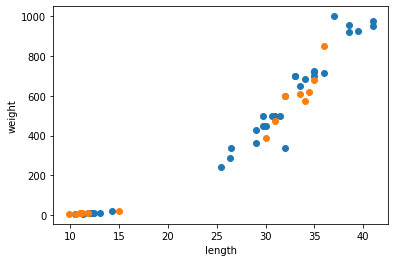

In [11]:
# 샘플이 골고루 섞였는지 확인.
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [12]:
# 머신러닝
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(train_input, train_target)
model.score(test_input, test_target)

1.0

In [13]:
model.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [14]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

**scikit-learn의 input과 output은 모두 numpy 배열이다.**

### Tip. np.random.shuffle api
* return이 필요없다.
* 주어진 배열(리스트)를 랜덤하게 섞는다. 다차원 배열의 경우는 맨 첫번째 차원에 대해서만 섞는다.

In [15]:
a = np.array([[1,2],[3,4], [5,6]])
np.random.shuffle(a)
a

array([[5, 6],
       [1, 2],
       [3, 4]])

## 2. 데이터 전처리
위에서 만든 모델에서 특정 데이터를 넣으면 생각치도 못한 잘못된 분류 예측을 해줌 - scaling의 문제.

In [18]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [19]:
import numpy as np

In [22]:
# np.column_stack([list1, list2])
# : 전달받은 리스트를 일렬로 세워 concat
# [[a, b] for a, b in zip(list1, list2)]
fish_data = np.column_stack([fish_length, fish_weight])
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [24]:
fish_target = np.concatenate([np.ones(35), np.zeros(14)])
fish_target[:5]

array([1., 1., 1., 1., 1.])

In [25]:
# train_test_split()을 사용한 data split

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data,
    fish_target,
    random_state=42,
    shuffle=True,    # default=True
    stratify=fish_target,  # stratify는 정답 라벨을 준다.
)

### 모델 생성
#### 수상한 도미 한 마리

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(train_input, train_target)
model.score(test_input, test_target)

1.0

**도미(1) 한 마리를 넣어본다.**

In [28]:
# [[25, 150]]은 도미임. 즉 1라벨
model.predict([[25, 150]])

array([0.])

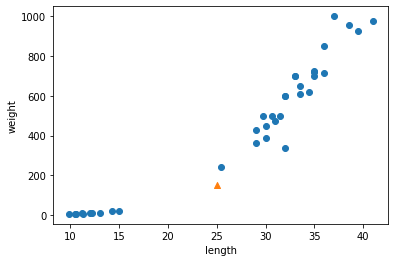

In [29]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

분명 도미(1)에 가까운데 빙어(0)으로 예측 됨.

In [31]:
# KNeighborsClassifier.kneighbors() 메서드
# : 샘플에서 가장 가까운 이웃을 찾아줌

distances, indexes = model.kneighbors([[25, 150]])
distances, indexes

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]]))

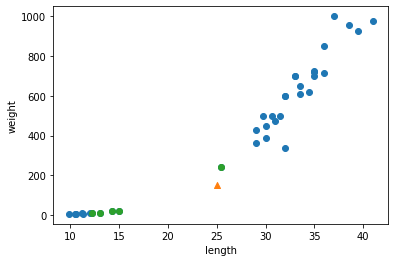

In [32]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 샘플에서 가장 가까운 샘플도 빙어가 4마리였다. 
* 원인은 distances에 들어간 거리를 보고 확인이 가능한데, 거리가 5샘플이 대부분 비슷한데 plot에서는 멀어 보인다. 즉, scale의 문제였다. x축은 범위가 좁고, y축은 범위가  넓어서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산된다.

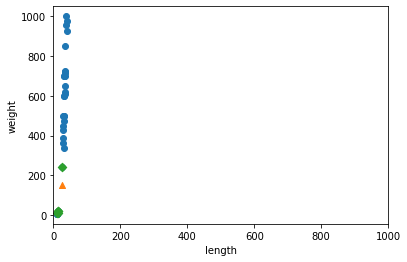

In [33]:
# xlim을 통해 정사각형으로 맞추면 스케일 문제가 확연해진다.
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**scaling은 ML에서 필수이며 알고리즘이 거리기반일 때는 특히 영향을 더 받는다.**

In [37]:
# scaling 방법 - 표준화
# np.mean(), np.std()는 axis를 주지 않으면 차원을 통틀어 계산해준다.
# axis를 주어 차원별로 계산 가능하다.
mean = np.mean(train_input, axis=0)
std = np.std(test_input, axis=0)
mean, std

(array([ 27.29722222, 454.09722222]), array([ 10.52687741, 327.37247465]))

[-0.21822447 -0.92890284]


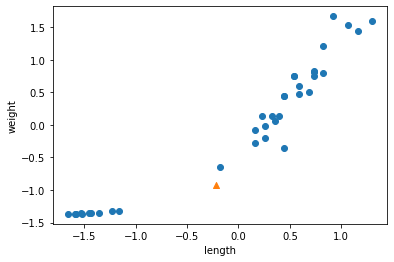

In [42]:
# test 데이터의 표준화는 train의 파라미터로 진행해야한다.
train_scaled = (train_input - mean) / std
new = ([25, 150] - mean) / std
print(new)

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [40]:
model.fit(train_scaled, train_target)

# train 파라미터로 스케일링! 필수
test_scaled = (test_input - mean) / std
model.score(test_scaled, test_target)

1.0

In [43]:
model.predict([new])

array([1.])

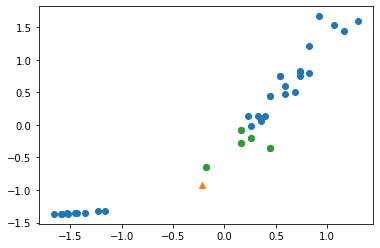

In [46]:
distances, indexes = model.kneighbors([new])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])
plt.show()

scailing으로 두 변수의 거리를 같게 해줬기 때문에 이제 올바른 neighbors를 확인할 수 있다.